# Descriptive Statistics

### Homework

Before you begin, remember to import the necessary libraries.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

#### Standard Exercises

1. Import the `planets` dataset via the `seaborn` library and assign it to an object named `df`.

In [17]:
df = sns.load_dataset("planets")

227

2. Compute the **mode**, **mean** and **median** of the `distance` variable in the `df` dataframe. *Note: use the `np.nanmean()` and `np.nanmedian()` function to ignore NaN values*

In [15]:
print(df["distance"].describe())
print(df["distance"].info())

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 1035 entries, 0 to 1034
Series name: distance
Non-Null Count  Dtype  
--------------  -----  
808 non-null    float64
dtypes: float64(1)
memory usage: 8.2 KB
None


In [51]:
s = df["distance"].dropna()
mean = np.nanmean(s)
median = np.nanmedian(s)
mode = stats.mode(s)

print(mean)
print(median)
print(mode)

264.0692821782178
55.25
ModeResult(mode=780.0, count=7)


3. Create a new DataFrame having the following specs: 
- its name is `df_stats` 
- it has shape `(1, 5)`
- populate it with the following columns `['min', 'mode', 'mean', 'median', 'max']`
- use the data from the `distance` column in the `df` dataset

In [50]:
df_stats = pd.DataFrame(index=range(1), columns=range(5))
df_stats.columns = ["min", "mode", "mean", "median", "max"]
df_stats.iloc[0] = [np.min(s), mode.mode, mean, median, np.max(s)]
df_stats

,min,mode,mean,median,max
0,1.35,780.0,264.069282,55.25,8500.0


4. Given the DataFrame you just created, try to imagine (without the aid of a chart) how the data may be distributed. You can probably tell quite a bit, but you still need some information about its dispersion or variability. Add three more columns to the `df_stats` DataFrame `['range', 'iqr', 'stdev']` that show the variable's **range**, **interquartile range** and **standart deviation**. *Note: make sure you select the appropriate `nan_policy` and `ddof` for the `stats.iqr()` and `np.std()` functions, respectively*

In [60]:
df_stats["range"] = np.max(s) - np.min(s)
df_stats["iqr"] = stats.iqr(s, rng=[25, 75])
df_stats["stdev"] = np.std(s, ddof=1)
df_stats

,min,mode,mean,median,max,range,iqr,stdev
0,1.35,780.0,264.069282,55.25,8500.0,8498.65,145.94,733.116493


5. The `sns.stripplot()` function allows you to perform a first visual check on the distribution of continuous variables. Check out the [relative documentation](https://seaborn.pydata.org/generated/seaborn.stripplot.html) and draw a **stripplot** just for the `distance` variable. Did it match your expectations from the previous question? 

<Axes: >

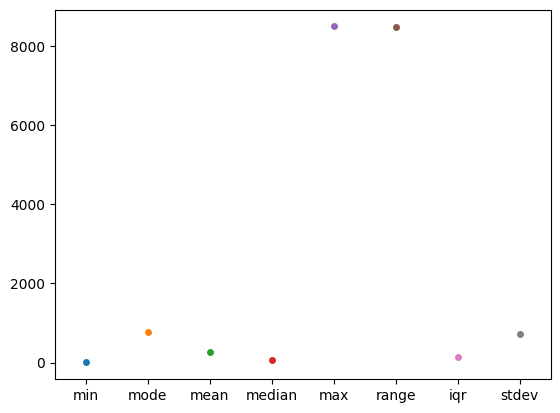

In [57]:
sns.stripplot(df_stats)

6. Write a function `my_median()` that, given a dataframe `df` and a column name `col` as inputs, returns the corresponding **median** value. If the input data contains NaN values, the function should be able to handle them by ignoring them. *Hint: check out the `.dropna()` method*

In [58]:
def my_median(df, col):
	return np.median(df[col].dropna())

#### Advanced Exercises

1. Write a function `my_stdev()` that, given a dataframe `df` and a column name `col` as inputs, returns the corresponding **standard deviation** value. If the input data contains NaN values, the function should be able to handle them by ignoring them.

In [59]:
def my_stdev(df, col):
	return np.std(df[col].dropna())

2. Write a function `my_stat()` that, given a dataframe `df`, a column name `col` and a statistic parameter `stat` as inputs, returns the corresponding desired statistic as chosen by the user from these four possible options: `['mean', 'median', 'iqr', 'stdev']`. If the input data contains NaN values, the function should be able to handle them by ignoring them.

In [83]:
def my_stat(df, col, stat):
	if stat not in ["mean", "median", "iqr", "stdev"]:
		raise ValueError

	clean_column = df[col].dropna()

	if stat == "mean":
		return np.mean(clean_column)

	if stat == "median":
		return np.median(clean_column)

	if stat == "iqr":
		return stats.iqr(clean_column, rng=[25, 75])

	return np.std(clean_column, ddof=1)

3. Load up the `iris` dataset via `seaborn` and assign it to a DataFrame object with the same name. Then, using `iris.describe()`, check out all the different statistics available for the four countinuos variables in the dataset. Once you have familiarised yourself with the [differences between sepals and petals](https://biologyreader.com/difference-between-sepals-and-petals.html): 
    1. assign the output table of the `iris.describe()` statement to a new DF object named `iris_stats` 
    2. add a new **row** to the DataFrame with index `iqr` and compute the IQR for eacn column of the DF
    3. study the table and try to visualise the shape of the data according to its measures of central tendency and statistical dispersion; what can you say about the shape of this data? *(hint: feel free to select just a relevant subset of statistics from the `iris_stats` DataFrame)*
    4. visualising sets of data in your head is no joke (although it is a useful exercise!); now visualize all four numeric variables from the `iris` dataset in the same plot using the `sns.stripplot()` function; did it match your expectations from the previous question? 

In [93]:
iris = sns.load_dataset("iris")
iris_stats = iris.describe()

In [96]:
for column in iris_stats.columns:
	iris_stats.loc["iqr", column] = my_stat(iris, column, "iqr")
	iris_stats.loc["outliers below", column] = iris_stats.loc["50%", column] - 1.5 *  iris_stats.loc["iqr", column]
	iris_stats.loc["outliers above", column] = iris_stats.loc["50%", column] + 1.5 *  iris_stats.loc["iqr", column]

print(iris_stats)

                sepal_length  sepal_width  petal_length  petal_width
count             150.000000   150.000000    150.000000   150.000000
mean                5.843333     3.057333      3.758000     1.199333
std                 0.828066     0.435866      1.765298     0.762238
min                 4.300000     2.000000      1.000000     0.100000
25%                 5.100000     2.800000      1.600000     0.300000
50%                 5.800000     3.000000      4.350000     1.300000
75%                 6.400000     3.300000      5.100000     1.800000
max                 7.900000     4.400000      6.900000     2.500000
iqr                 1.300000     0.500000      3.500000     1.500000
outliers above      7.750000     3.750000      9.600000     3.550000
outliers below      3.850000     2.250000     -0.900000    -0.950000


Petal length has the widest range of values (indicated by the biggest interquartile range). Sepal length seem to have a few outliers on the upper end (50% value == median + 1.5 * iqr is lower than the max value).
the series data for petal length (distribution-wise) seems to be slightly skewed toward more distribution of values in lower half

<Axes: >

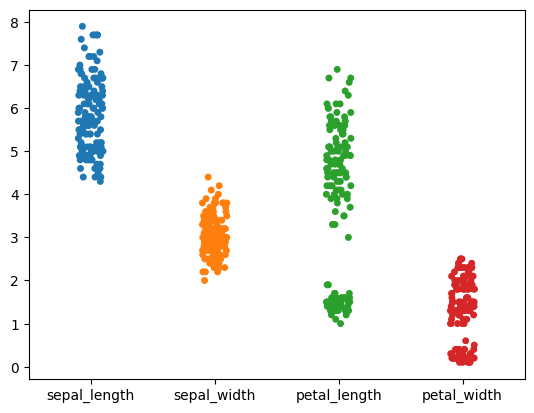

In [98]:
sns.stripplot(iris)

<Axes: >

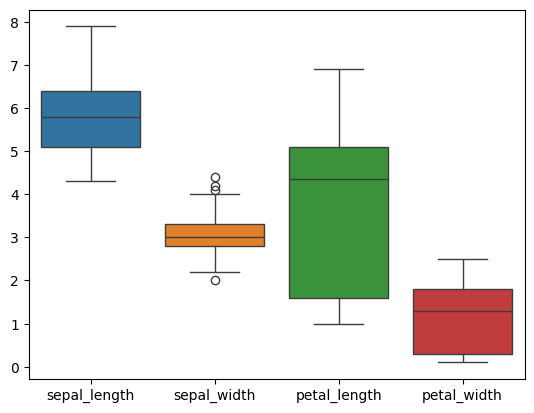

In [99]:
sns.boxplot(iris)

<Axes: ylabel='Count'>

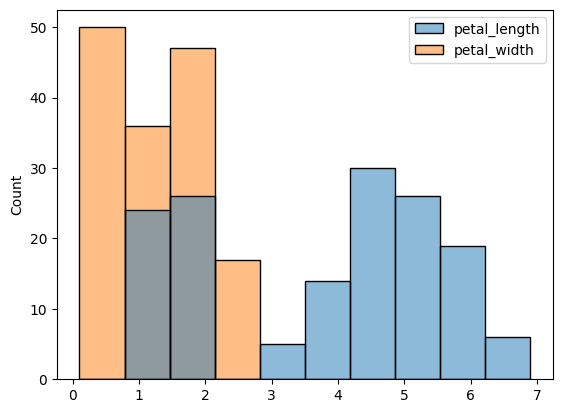

In [105]:
sns.histplot(iris[["petal_length", "petal_width"]])

<Axes: ylabel='Count'>

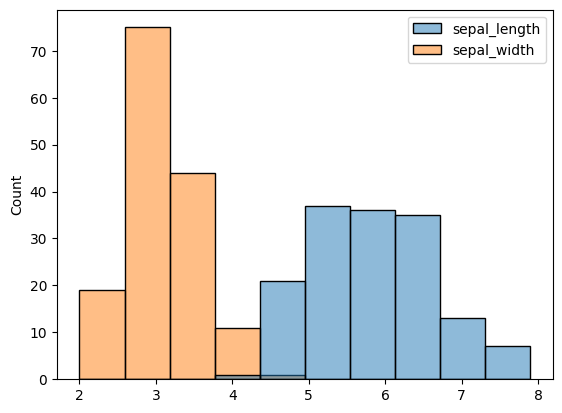

In [107]:
sns.histplot(iris[["sepal_length", "sepal_width"]])

correct predictions:
- Petal length has the widest range of values
- the series data for petal length (distribution-wise) seems to be slightly skewed toward more distribution of values in lower half

incorrect:
- Sepal length seem to have a few outliers on the upper end (50% value == median + 1.5 * iqr is lower than the max value).